In [1]:
#importing necessary libraries for analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
from scipy import stats

In [2]:
#loading dataset
df=pd.read_csv('50_Startups.csv')

# printing first five rows of dataset
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


So, there are total 5 columns available in which 4 are numerical and 1 is categorical and our target column or label is Profit and the rest are independent column. We have to do the analysis and then training the model by Multi linear regression



In [4]:
#checking if any null value is present or not
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
# seeing the statistics of the dataset
df.describe(include="all")

,R&D Spend,Administration,Marketing Spend,State,Profit
count,50.000000,50.000000,50.000000,50,50.000000
unique,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,California,NaN
freq,NaN,NaN,NaN,17,NaN
mean,73721.615600,121344.639600,211025.097800,NaN,112012.639200
std,45902.256482,28017.802755,122290.310726,NaN,40306.180338
min,0.000000,51283.140000,0.000000,NaN,14681.400000
25%,39936.370000,103730.875000,129300.132500,NaN,90138.902500
50%,73051.080000,122699.795000,212716.240000,NaN,107978.190000
75%,101602.800000,144842.180000,299469.085000,NaN,139765.977500


So we have 50 rows available and in categorical there are 3 unique values available in which maximum data is for California.



**Visualizing the dataset**

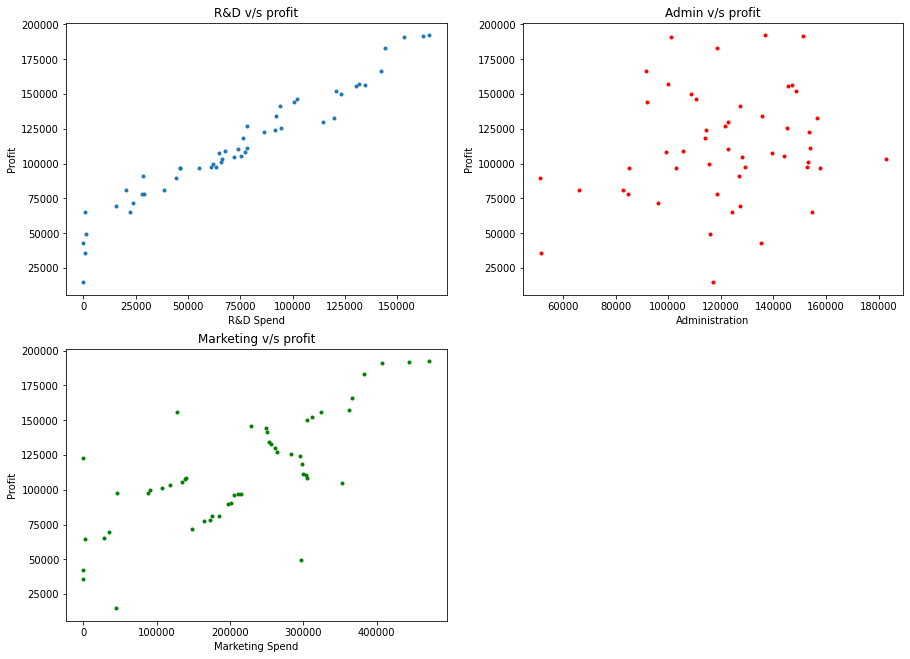

In [6]:
#visualising numerical columns
# plot1
fig=plt.figure(figsize=(15,11))
ax0=plt.subplot(221)
ax0.plot(df['R&D Spend'],df['Profit'],'.')
ax0.set_xlabel('R&D Spend');
ax0.set_ylabel('Profit');
ax0.set_title('R&D v/s profit')
# plot2
ax1=plt.subplot(222)
ax1.plot(df['Administration'],df['Profit'],'.',color='red')
ax1.set_xlabel('Administration')
ax1.set_ylabel('Profit');
ax1.set_title('Admin v/s profit')
#plot3
ax2=plt.subplot(223)
ax2.plot(df['Marketing Spend'],df['Profit'],'.',color='green')
ax2.set_xlabel('Marketing Spend')
ax2.set_ylabel('Profit');
ax2.set_title('Marketing v/s profit')
plt.show();

Here only R&D and Marketing spend showing a clear linear relationship between profit whereas administration are much scatter but still have some linear relationship between profit.

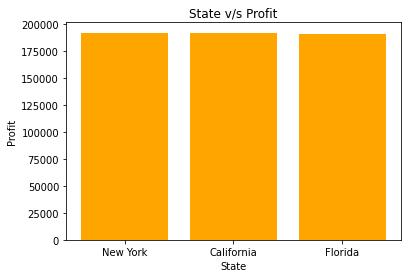

In [7]:
#visualising the Categorical column
plt.bar(df['State'],df['Profit'],color='orange')
plt.xlabel('State')
plt.ylabel('Profit')
plt.title('State v/s Profit')
plt.show();

Here the three states showing not much different from each other in making profit for startups. So we can do one hot encoding for changing the categorical into numerical or simply drop the column during training.

Now after visualizing we have to split the data into train and test.

**Splitting the dataset**

In [8]:
#importing necessary library for splitting 
from sklearn.model_selection import train_test_split

In [9]:
#dividing the data into independent(X) and dependent(Y) variable
X=df.iloc[:,:3].values
Y=df['Profit'].values

#checking the shape
print('X:',X.shape)
print('Y:',Y.shape)

X: (50, 3)
Y: (50,)


In [10]:
#splitting into train and test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

Now, its time to train the dataset using linear regression

**Training the model**

In [11]:
#importing necessary libary for training
from sklearn.linear_model import LinearRegression

# initializing the model
model=LinearRegression()

In [12]:
# fitting the train data into the model
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
#predicting a single value
model.predict([[165349.20,136897.80,471784.10]])

array([190971.40648882])

In [14]:
#predicting multiple values
#1. On train data
y_pred_train=model.predict(X_train)
#2. On test data
y_pred_test=model.predict(X_test)

In [15]:
#checking the score(accuracy)
acc=model.score(X_test,Y_test)
print('Accuracy:',acc*100)

Accuracy: 95.35462194580043



Accuracy: 95.35462194580043

So our model is showing 95% of accuracy

In [16]:
#checking the error from sklearn.metrics
from sklearn.metrics import mean_squared_error
mse=np.sqrt(mean_squared_error(Y_test,y_pred_test))
print("Mean Square Error:",mse)

Mean Square Error: 8583.728665571101


Mean Square Error: 8583.728665571103

Since we have a Mean Square Error of approx. 8584

In [17]:
#checking the coefficients and intercepts
print('Coefficient:',model.coef_)
print('Intercept:',model.intercept_)

Coefficient: [ 0.77011884 -0.01413267  0.03477756]
Intercept: 49160.10549525703


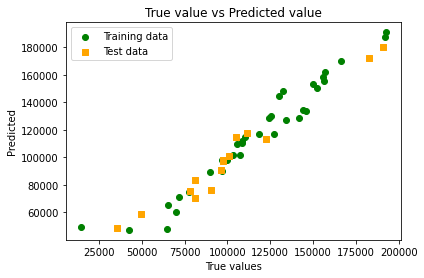

In [18]:
#visualizing the model trained
plt.scatter(Y_train ,y_pred_train,c='green',marker='o',label='Training data')
plt.scatter(Y_test,y_pred_test,c='orange',marker='s',label='Test data')
plt.xlabel('True values')
plt.ylabel('Predicted')
plt.title("True value vs Predicted value")
plt.legend(loc= 'upper left')
plt.plot()
plt.show();